<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork956-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **TRABAJO PRÁCTICO**


Estimated time needed: **30** minutes


The goal of regression analysis is to describe the relationship between one set of variables called the dependent variables, and another set of variables, called independent or explanatory variables. When there is only one explanatory variable, it is called simple regression.


## **Resumen de las tareas del proyecto**


**Proyecto final:** Para el escenario del proyecto, he aquí un resumen de sus tareas. Las siguientes secciones de lectura le proporcionarán instrucciones detalladas para cada tarea.


**Tareas del proyecto:**
* **Tarea 1:** Familiarícese con el conjunto de datos 
* **Tarea 2:** Genere estadísticas y visualizaciones básicas para la alta dirección. 
* **Tarea 3:** Utilice las pruebas adecuadas para responder a las preguntas planteadas.
* **Tarea 4:** Comparta su cuaderno Jupyter.


----


## Tarea 1: Familiarizarse con el conjunto de datos

A continuación, se describen las variables del conjunto de datos:
- CRIM - tasa de delincuencia per cápita por ciudad
- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por localidad.
- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a las autopistas radiales
- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
- PTRATIO - proporción alumnos-profesor por ciudad
- LSTAT - % más bajo de la población
- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


----

## Tarea 2: Generar estadísticas descriptivas y visualizaciones

Para todas las visualizaciones, incluya un título en cada gráfico y las etiquetas adecuadas
Genere lo siguiente y explique sus conclusiones:

- Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un **diagrama de caja (boxplot)**
- Proporcione un **diagrama de barras** para la variable "río Charles
- Proporcione un **boxplot** para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)
- Proporcione un **diagrama de dispersión** para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?
- Cree un **histograma** para la variable proporción de alumnos por profesor


----

## Importar Librarias


Importar las bibliotecas que necesitamos para el laboratorio

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats

Leer el archivo csv desde la URL utilizando la biblioteca de peticiones

In [107]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Preparación del dataset previo al análisis

Mostramos los primeros 5 grupos de datos para corroborar el nombre de cada uno de ellos. 

In [108]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [109]:
sns.set_style("whitegrid")

## Tarea 2 - Resultados

1- Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un **diagrama de caja (boxplot)**

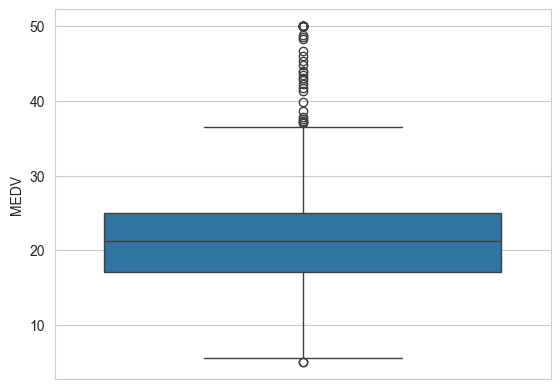

In [110]:
ax = sns.boxplot(y='MEDV', data=boston_df)

**Conclusion** 
- La mediana está cerca del centro de la caja, la distribución es simétrica (mediana MEDV alrededor de 22).
- Los bigotes son aproximadamente iguales en longitud, la dispersión es uniforme.
- Hay valores atípicos, arriba de un MEDV de 37 aproximadamente.

2- Proporcione un **diagrama de barras** para la variable "río Charles

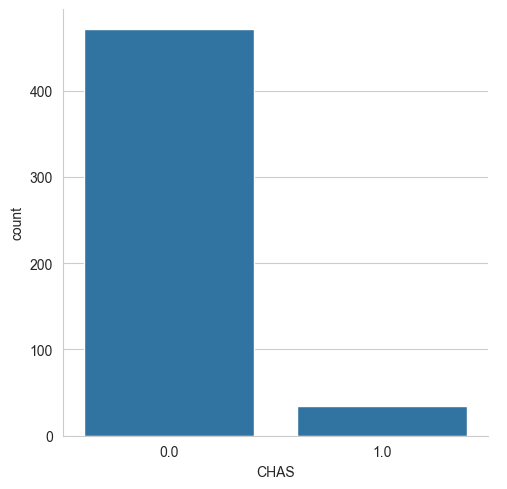

In [111]:
sns.catplot(x='CHAS', kind='count', data=boston_df)

**Conclusión** 
La mayoría de las viviendas no lindan con el Río Charles. 

3- Proporcione un **boxplot** para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

In [112]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [113]:
thirtyfive_lower = boston_df[boston_df['AGE'] == '35 years and younger']['MEDV']
thirtyfive_seventeen = boston_df[boston_df['AGE'] == 'between 35 and 70 years']['MEDV']
seventeen_older = boston_df[boston_df['AGE'] == '70 years and older']['MEDV']

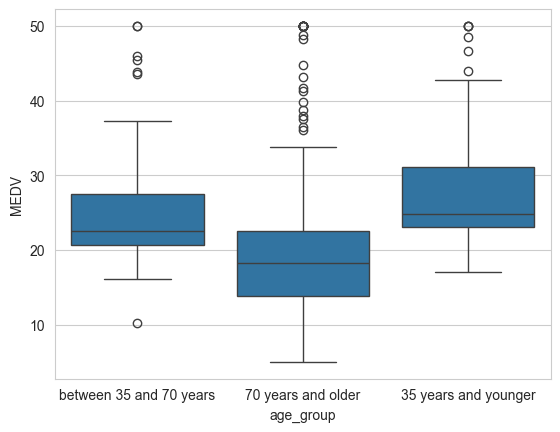

In [114]:
ax=sns.boxplot( x="age_group", y="MEDV",data=boston_df)

4 - Proporcione un **diagrama de dispersión** para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

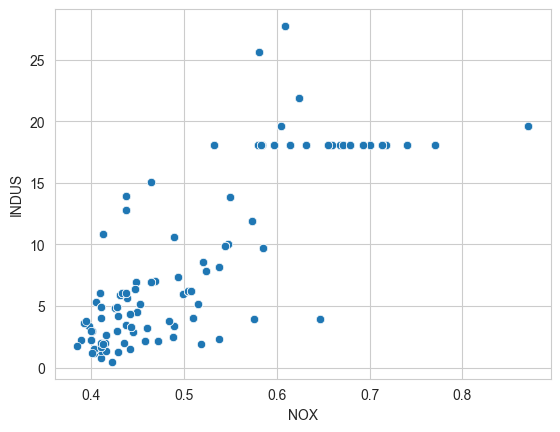

In [115]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

**Conclusión**
- A bajos niveles de óxido nítrico existe un la proporción "líneal" de acres comerciales no minoristas por ciudad.
- Para niveles de óxido nítrico mayores que 0.55 no sepuede establecer proporción de acres comerciales no minoristas por ciudad

5 - Cree un **histograma** para la variable proporción de alumnos por profesor

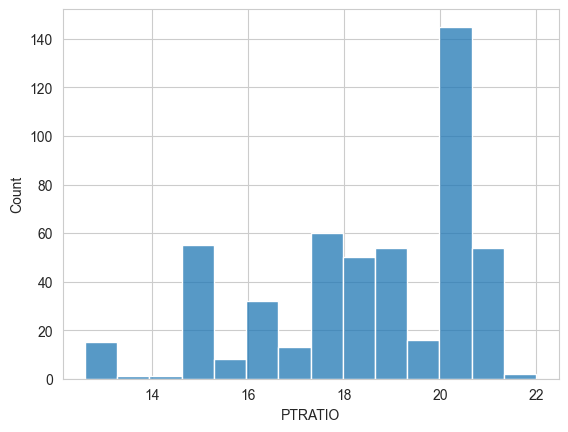

In [116]:
ax=sns.histplot(boston_df['PTRATIO'], kde=False) 

**Conclusión**
Podemos decir que la proporción de alumnos por profesor no es una distribucion normal. Ya que tiene valores dispares. 

----

## Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean.

Para cada una de las siguientes preguntas
- ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)
- ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)
- ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)
- ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)
Asegúrese de:
1.	Enunciar su hipótesis.
2.	Utilizar α = 0,05
3.	Realice la prueba Estadística.
4.	Exponga la conclusión de la prueba.


-----

## Tarea 3 - Resultados

1 - ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

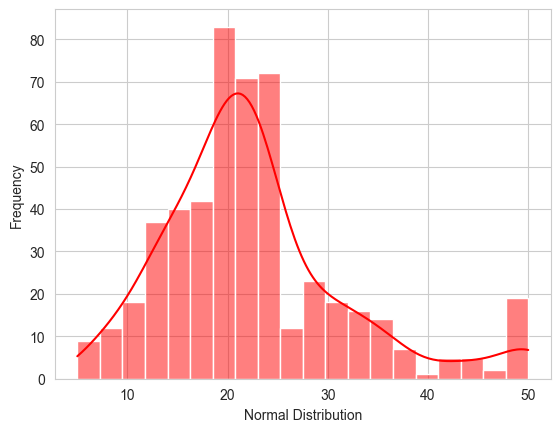

In [117]:
ax = sns.histplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

State the hypothesis
* $H_0: µ_1 = µ_2$ ("No existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles")
* $H_1: µ_1 ≠ µ_2$ ("Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles")


In [118]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusión:** Dado que el valor p es inferior al valor alfa 0,05, rechazamos la hipótesis nula, ya que hay pruebas suficientes de que existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles 

2 - ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

En primer lugar, agrupamos los datos en tres categorias, ya que el ANOVA unidireccional no puede funcionar con variables continuas: utilizando el ejemplo anterior en la Tarea 2. Nuestras categorías serán cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 que tienen:
* 35 años o menos
* entre 35 y 70 años
* 70 años o más

Hipótesis
* $H_0: µ_1 = µ_2 = µ_3$ (Las tres medias son iguales)
* $H_1:$ Al menos una media es diferente


Prueba de igualdad de varianza

In [119]:
scipy.stats.levene(boston_df.loc[boston_df['age_group'] == '35 years and younger']['MEDV'],
boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
boston_df.loc[boston_df['age_group'] == '70 years and older']['MEDV'],center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [120]:
thirtyfive_lower_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventeen_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventeen_older_MEDV = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [121]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_MEDV, thirtyfive_seventeen_MEDV, seventeen_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Si se utiliza la función **OLS** de la biblioteca **statsmodel**

In [122]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


**Conclusión:** Dado que el valor p no es superior a 0,05, rechazaremos la hipótesis nula, ya que hay pruebas significativas de que al menos una de las medias difiera.

3 ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

Hipótesis
* $H_0:$ No existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad
* $H_1:$ Existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad

In [123]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

**Conclusión:** Dado que el valor p < 0,05, rechazamos la hipótesis nula y concluimos que existe una relación existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

4- ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

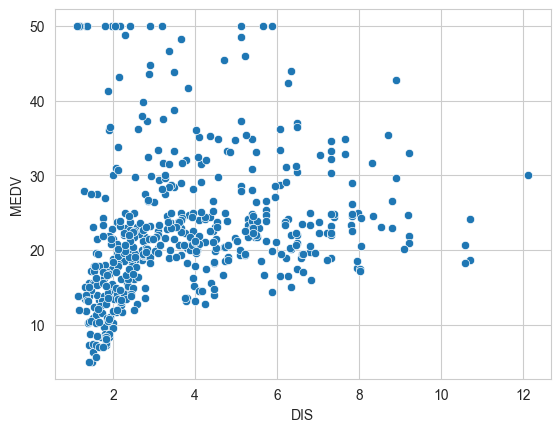

In [127]:
ax = sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

* $H_0: β1$ = 0 (El impacto no es significativo)
* $H_1: β1$ no es igual a 0 (El impacto es significativo)

In [125]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 May 2024   Prob (F-statistic):           1.21e-08
Time:                        00:30:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusión:** p < 0,05 hay indicios de correlación entre una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios, con lo cual el impacto es significativo. 

----